## Exploratory Data Analysis (EDA) on LaDe data 📦

[LaDe](https://github.com/wenhaomin/LaDe?tab=readme-ov-file) is the first comprehensive last-mile delivery dataset from industry. 

<img src="Last_mile_delivery.png" alt="Last mile delivery" width="500">

For more information about last-mile delivery, read: [Last-Mile Delivery: Definition and Trends](https://alaakhamis.medium.com/last-mile-delivery-e369dcb8d5cf)

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

### Load data from a local folder into a DataFrame

In [2]:
# # Local file path
# df = pd.read_csv("lade_d_sample.csv")

# print("Local DataFrame shape:", df.shape)
# df.head()

### Load data from url into a DataFrame

In [ ]:
url = "https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/main/2_Statistics/data/lade_d_sample.csv"

df = pd.read_csv(url)   

print(df.shape)
df.head()

(1000, 17)


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001


### Exploratory Data Analysis (EDA)

#### Basic Information

In [4]:
print("DataFrame shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe(include='all'))

DataFrame shape: (1000, 17)

Column names: ['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id', 'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat', 'delivery_time', 'delivery_gps_time', 'delivery_gps_lng', 'delivery_gps_lat', 'ds']

Data types:
 order_id               int64
region_id              int64
city                  object
courier_id             int64
lng                  float64
lat                  float64
aoi_id                 int64
aoi_type               int64
accept_time           object
accept_gps_time       object
accept_gps_lng       float64
accept_gps_lat       float64
delivery_time         object
delivery_gps_time     object
delivery_gps_lng     float64
delivery_gps_lat     float64
ds                     int64
dtype: object

Missing values per column:
 order_id             0
region_id            0
city                 0
courier_id           0
lng                  0
lat                  0
aoi_id               0
aoi_type

#### Check for duplicates

In [5]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


#### Numeric column distributions

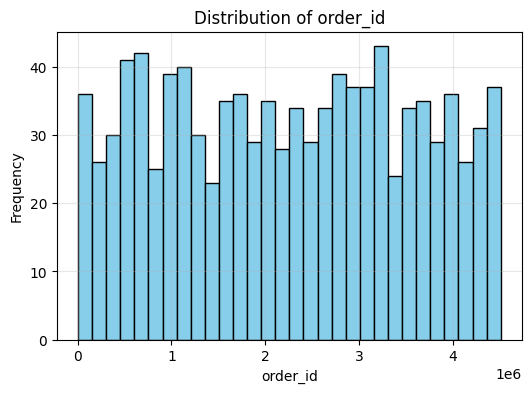

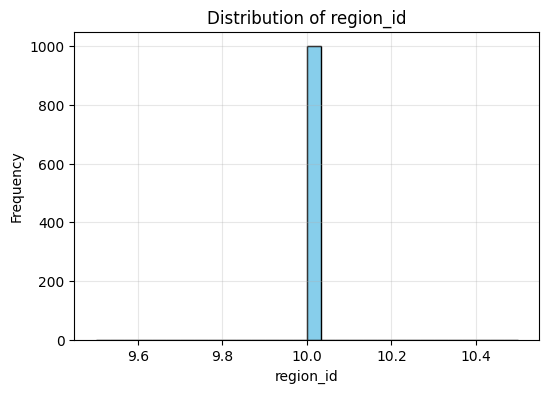

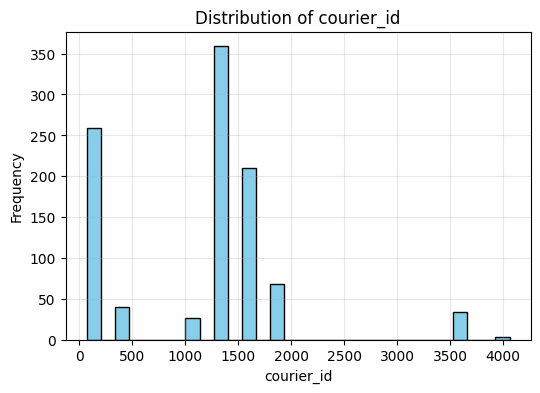

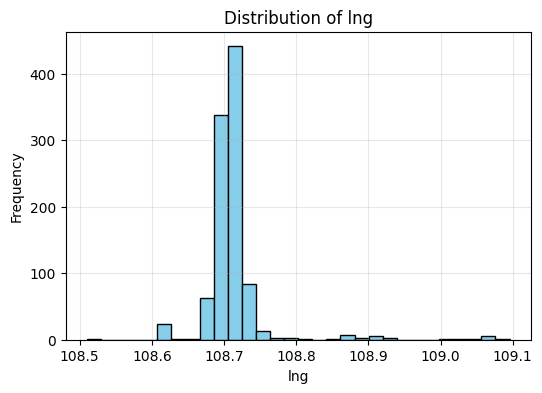

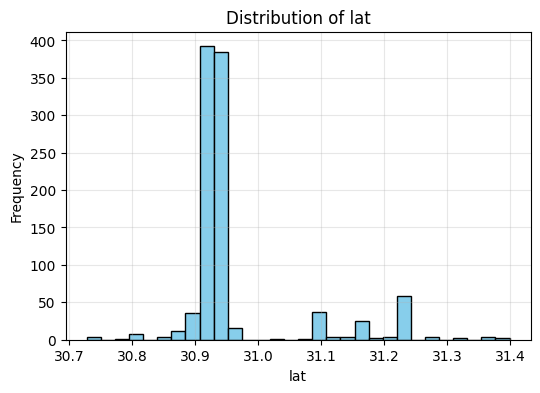

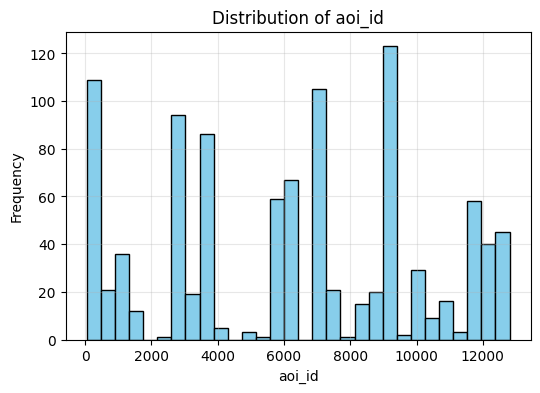

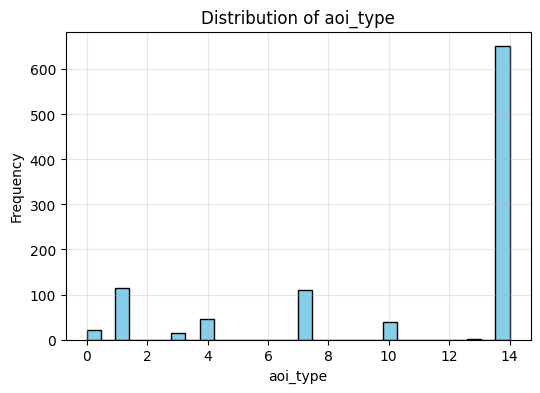

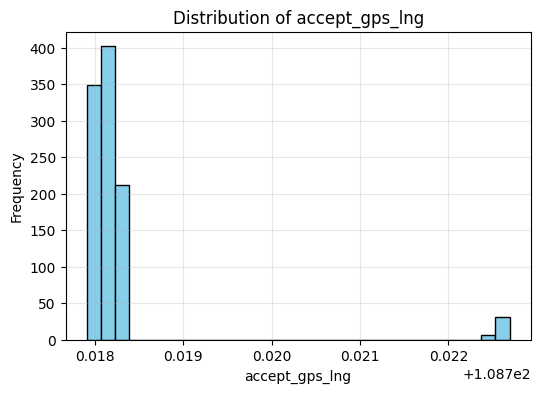

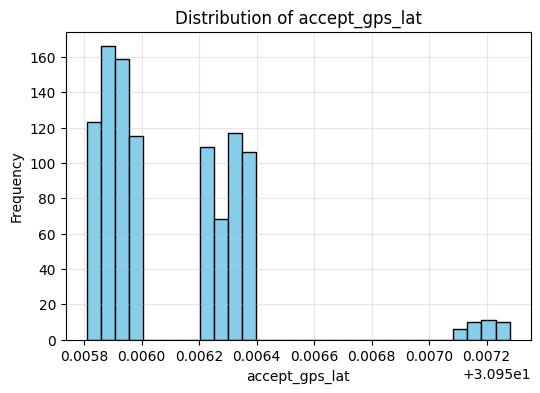

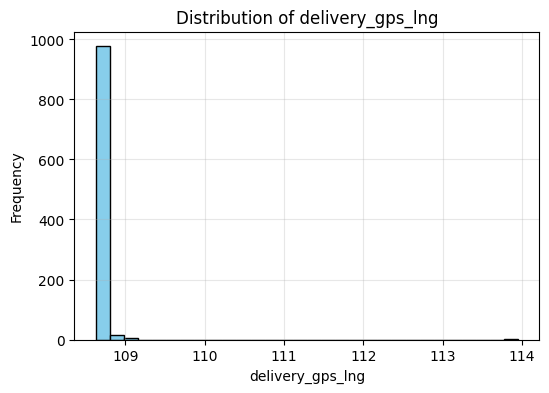

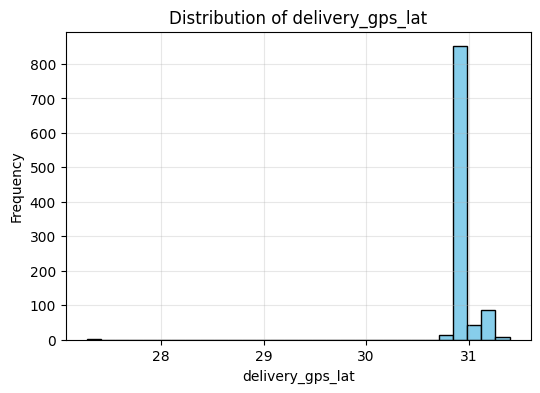

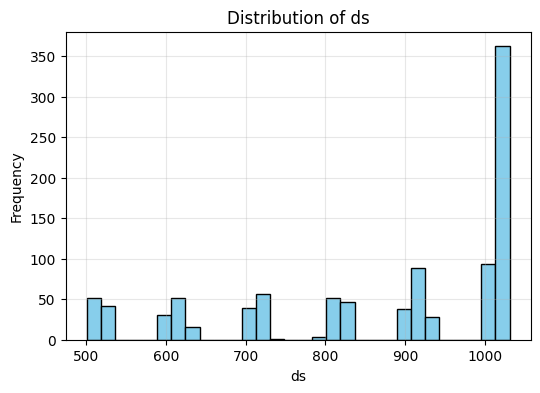

In [6]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()

#### Categorical column distributions

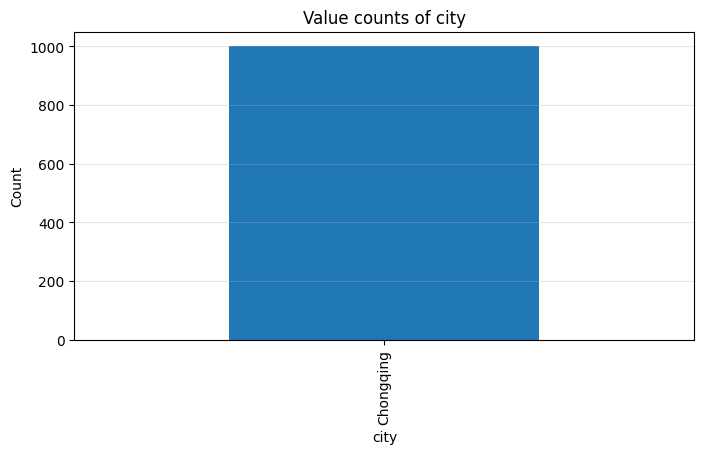

Skipped plotting 'accept_time' (too many unique values: 801)
Skipped plotting 'accept_gps_time' (too many unique values: 801)
Skipped plotting 'delivery_time' (too many unique values: 976)
Skipped plotting 'delivery_gps_time' (too many unique values: 976)


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() <= 30:  # plot only if not too many categories
        plt.figure(figsize=(8,4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Value counts of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.grid(True, axis='y', alpha=0.3)
        plt.show()
    else:
        print(f"Skipped plotting '{col}' (too many unique values: {df[col].nunique()})")

#### Correlation heatmap (numerical features)

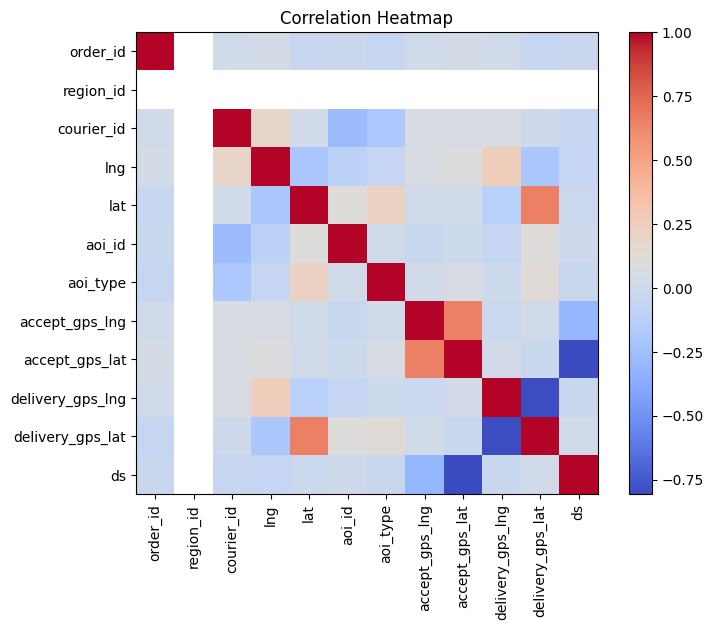

In [8]:
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(8,6))
    plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Heatmap")
    plt.show()

#### Geo Visualization (Folium)

In [9]:
# Build a small frame with just lat/lng (limit rows for performance)
N_POINTS = 5000
df_geo = df[["lat", "lng"]].dropna().copy()
df_geo = df_geo[df_geo["lat"].between(-90, 90) & df_geo["lng"].between(-180, 180)]
df_geo = df_geo.head(N_POINTS)

if df_geo.empty:
    print("No valid lat/lng rows to plot.")
else:
    # Center map on mean location
    center_lat = float(df_geo["lat"].mean())
    center_lon = float(df_geo["lng"].mean())
    m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles="CartoDB Positron")

    cluster = MarkerCluster(name="Locations").add_to(m)
    for _, row in df_geo.iterrows():
        folium.CircleMarker(
            location=[row["lat"], row["lng"]],
            radius=3,
            weight=1,
            fill=True,
            fill_opacity=0.7
        ).add_to(cluster)

    folium.LayerControl().add_to(m)
    display(m)

    # # Robust fallback: open this in your browser if VS Code webview hides tiles
    # m.save("map.html")
    # print("Saved interactive map to map.html")